## standard, min-max, robust 비교 고찰

In [4]:
import pandas as pd 
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# data
x = pd.DataFrame({
    # Distribution with lower outliers
    'x1': np.concatenate([np.random.normal(20, 2, 1000), np.random.normal(1, 2, 25)]),
    # Distribution with higher outliers
    'x2': np.concatenate([np.random.normal(30, 2, 1000), np.random.normal(50, 2, 25)]),
})
np.random.normal

<function RandomState.normal>

In [17]:
scaler = StandardScaler()
std_df = scaler.fit_transform(x)
std_df = pd.DataFrame(std_df, columns=['x1', 'x2'])
std_df

,x1,x2
0,1.086036,-0.256510
1,0.819917,-0.356124
2,0.154543,-0.142575
3,-0.890140,0.297642
4,1.136237,-0.687216
...,...,...
1020,-4.724122,5.647943
1021,-5.439176,5.413074
1022,-5.084521,5.127780
1023,-4.325387,5.692683


In [9]:
scaler = MinMaxScaler()
mima_df = scaler.fit_transform(x)
mima_df = pd.DataFrame(mima_df, columns=['x1', 'x2'])
mima_df  

,x1,x2
0,0.876799,0.193572
1,0.844311,0.181953
2,0.763079,0.206860
3,0.635541,0.258203
4,0.882928,0.143338
...,...,...
1020,0.167476,0.882213
1021,0.080180,0.854820
1022,0.123477,0.821546
1023,0.216155,0.887431


In [11]:
scaler = RobustScaler()
robust_df = scaler.fit_transform(x)
robust_df = pd.DataFrame(robust_df, columns=['x1', 'x2'])
robust_df    

,x1,x2
0,1.350368,-0.174117
1,0.985978,-0.313265
2,0.074898,-0.014966
3,-1.355561,0.599959
4,1.419107,-0.775756
...,...,...
1020,-6.605340,8.073614
1021,-7.584446,7.745534
1022,-7.098824,7.347016
1023,-6.059362,8.136109


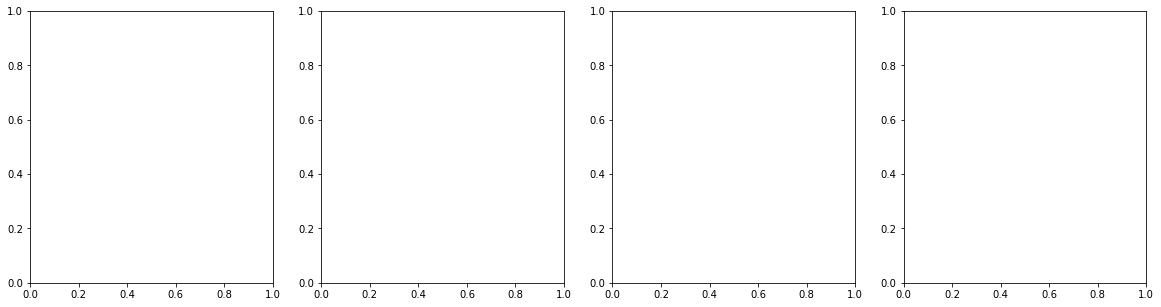

In [12]:
# 도화지 만들기
fig , (ax1, ax2, ax3, ax4) = plt.subplots(ncols=4, figsize=(20,5))

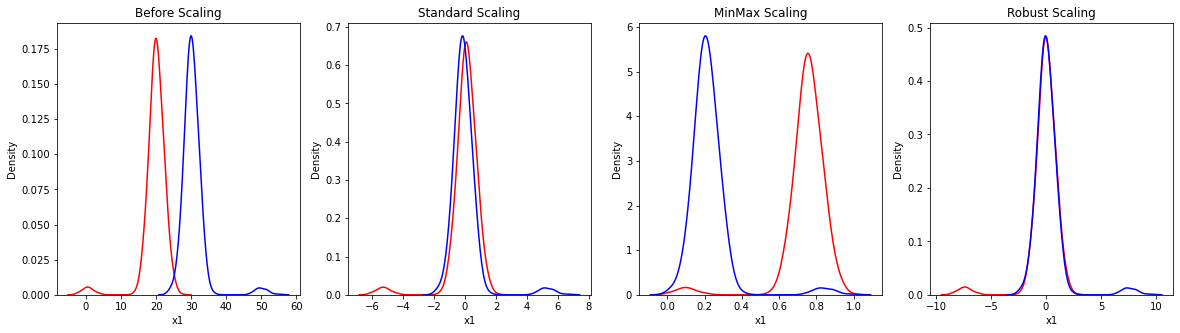

In [21]:
fig , (ax1, ax2, ax3, ax4) = plt.subplots(ncols=4, figsize=(20,5))

ax1.set_title("Before Scaling")
sns.kdeplot(x['x1'], ax=ax1, color='red')
sns.kdeplot(x['x2'], ax=ax1, color='blue')

ax2.set_title("Standard Scaling")
sns.kdeplot(std_df['x1'], ax=ax2, color='red')
sns.kdeplot(std_df['x2'], ax=ax2, color='blue')

ax3.set_title("MinMax Scaling")
sns.kdeplot(mima_df['x1'], ax=ax3, color='red')
sns.kdeplot(mima_df['x2'], ax=ax3, color='blue')

ax4.set_title("Robust Scaling")
sns.kdeplot(robust_df['x1'], ax=ax4, color='red')
sns.kdeplot(robust_df['x2'], ax=ax4, color='blue')

plt.show()

### Stnadard Scaling
- sklearn.preprocessing.StandardScaler
- Methods
    - fit(X[, y, sample_weight]) : Compute the mean and std to be used for later scaling.

    - fit_transform(X[, y]) : Fit to data, then transform it.

    - get_feature_names_out([input_features]) : Get output feature names for transformation.

    - get_params([deep]) : Get parameters for this estimator.

    - inverse_transform(X[, copy]) : Scale back the data to the original representation.

    - partial_fit(X[, y, sample_weight]) : Online computation of mean and std on X for later scaling.

    - set_params(**params): Set the parameters of this estimator.

    - transform(X[, copy]) : Perform standardization by centering and scaling.

In [23]:
from sklearn.datasets import load_iris
import pandas as pd 

# 붓꽃 데이터셋을 로딩하고 DataFrame으로 변환
iris = load_iris()
iris_data = iris.data
iris_df = pd.DataFrame(data=iris_data, columns=iris.feature_names)

print('feature들의 평균 값')
print(iris_df.mean())
print('feature들의 분산 값')
print(iris_df.var())

feature들의 평균 값
sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64
feature들의 분산 값
sepal length (cm)    0.685694
sepal width (cm)     0.189979
petal length (cm)    3.116278
petal width (cm)     0.581006
dtype: float64


In [24]:
from sklearn.preprocessing import StandardScaler
# StandardScaler 객체 생성
scaler = StandardScaler()
# StandardScaler로 데이터 셋 변환. fit()과 transform() 호출
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)

# transform() 시 scale 변환된 데이터 셋이 numpy ndarray로 반환되어 이를 DataFrame으로 변환
iris_scaled_df1 = pd.DataFrame(iris_scaled, columns = iris.feature_names)
# iris_scaled_df.describe()
print('feature 들의 평균 값')
print(iris_scaled_df1.mean())
print('\nfeature 들의 분산 값')
print(iris_scaled_df1.var())

feature 들의 평균 값
sepal length (cm)   -1.690315e-15
sepal width (cm)    -1.842970e-15
petal length (cm)   -1.698641e-15
petal width (cm)    -1.409243e-15
dtype: float64

feature 들의 분산 값
sepal length (cm)    1.006711
sepal width (cm)     1.006711
petal length (cm)    1.006711
petal width (cm)     1.006711
dtype: float64


### MinMax Scaler
- sklearn.preprocessing.MinMaxScaler
- Methods
    - fit(X[, y]) : Compute the minimum and maximum to be used for later scaling.
    - fit_transform(X[, y]) : Fit to data, then transform it.
    - get_feature_names_out([input_features]) : Get output feature names for transformation.
    - get_params([deep]) : Get parameters for this estimator.
    - inverse_transform(X) : Undo the scaling of X according to feature_range.
    - partial_fit(X[, y]) : Online computation of min and max on X for later scaling.
    - set_params(**params) : Set the parameters of this estimator.
    - transform(X) : Scale features of X according to feature_range.

In [28]:
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
scaler = MinMaxScaler()
# MinMaxScaler 로 데이터셋 변환. fit() 과 transform() 호출
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)

#transform()시 scale 변환된 데이터 셋이 numpy ndarry로 반환되어 이를 Dataframe으로 변환
iris_scaled_df2 = pd.DataFrame(data=iris_scaled, columns = iris.feature_names)

print('feature들의 최소 값')
print(iris_scaled_df2.min())
print('feature들의 최대 값')
print(iris_scaled_df2.max())

feature들의 최소 값
sepal length (cm)    0.0
sepal width (cm)     0.0
petal length (cm)    0.0
petal width (cm)     0.0
dtype: float64
feature들의 최대 값
sepal length (cm)    1.0
sepal width (cm)     1.0
petal length (cm)    1.0
petal width (cm)     1.0
dtype: float64


### Robust scaling


In [31]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)

iris_scaled_df3 = pd.DataFrame(data=iris_scaled, columns= iris.feature_names)

print('feature들의 평균')
print(iris_scaled_df3.mean())
print('feature들의 분산')
print(iris_scaled_df3.var())

feature들의 평균
sepal length (cm)    0.033333
sepal width (cm)     0.114667
petal length (cm)   -0.169143
petal width (cm)    -0.067111
dtype: float64
feature들의 분산
sepal length (cm)    0.405736
sepal width (cm)     0.759918
petal length (cm)    0.254390
petal width (cm)     0.258225
dtype: float64


In [ ]:
from sklearn.preprocessing import RobustScaler
rbscaler = RobustScaler()
rbscaler.fit(iris_df)
iris_rbscaled = rbscaler.transform(iris_df)
iris_df_rbscaled = pd.DataFrame(data=iris_rbscaled, columns=iris.feature_names)
iris_df_rbscaled

import matplotlib.pyplot as plt
import seaborn as sns

fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols=4, figsize=(20,5))

ax1.set_title(‘Before Scaling’)
sns.kdeplot(iris_df[‘sepal length (cm)’], ax = ax1, color = ‘r’)
sns.kdeplot(iris_df[‘sepal width (cm)’], ax = ax1, color = ‘y’)
sns.kdeplot(iris_df[‘petal length (cm)’], ax = ax1, color = ‘g’)
sns.kdeplot(iris_df[‘petal width (cm)’], ax = ax1, color = ‘b’)

ax2.set_title(‘Standard Scaling’)
sns.kdeplot(iris_df_scaled[‘sepal length (cm)’], ax = ax2, color = ‘r’)
sns.kdeplot(iris_df_scaled[‘sepal width (cm)’], ax = ax2, color = ‘y’)
sns.kdeplot(iris_df_scaled[‘petal length (cm)’], ax = ax2, color = ‘g’)
sns.kdeplot(iris_df_scaled[‘petal width (cm)’], ax = ax2, color = ‘b’)

ax3.set_title(‘MinMax Scaling’)
sns.kdeplot(iris_df_mscaled[‘sepal length (cm)’], ax = ax3, color = ‘r’)
sns.kdeplot(iris_df_mscaled[‘sepal width (cm)’], ax = ax3, color = ‘y’)
sns.kdeplot(iris_df_mscaled[‘petal length (cm)’], ax = ax3, color = ‘g’)
sns.kdeplot(iris_df_mscaled[‘petal width (cm)’], ax = ax3, color = ‘b’)

ax4.set_title(‘Robust Scaling’)
sns.kdeplot(iris_df_rbscaled[‘sepal length (cm)’], ax = ax4, color = ‘r’)
sns.kdeplot(iris_df_rbscaled[‘sepal width (cm)’], ax = ax4, color = ‘y’)
sns.kdeplot(iris_df_rbscaled[‘petal length (cm)’], ax = ax4, color = ‘g’)
sns.kdeplot(iris_df_rbscaled[‘petal width (cm)’], ax = ax4, color = ‘b’)

plt.show()


### Titanic 

In [68]:
import pandas as pd 
tit_df = pd.read_csv("./csv/train.csv")
tit_df.drop(["PassengerId", "Name", "SibSp", "Parch", "Cabin"], axis=1, inplace=True)
tit_df["Age"] = tit_df["Age"].fillna(tit_df["Age"].mean())
tit_df["Embarked"] = tit_df["Embarked"].fillna("S")

In [47]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   Ticket    891 non-null    object 
 5   Fare      891 non-null    float64
 6   Embarked  891 non-null    object 
dtypes: float64(2), int64(2), object(3)
memory usage: 48.9+ KB


In [63]:
# from sklearn.preprocessing import LabelEncoder

# import pandas as pd
# import numpy as np

# encoder = LabelEncoder()
# titanic["Sex"] = encoder.fit_transform(titanic["Sex"])
# titanic["Ticket"] = encoder.fit_transform(titanic["Ticket"])
# titanic["Embarked"] = encoder.fit_transform(titanic["Embarked"])

# titanic

In [69]:
dummy_data = pd.get_dummies(tit_df[["Sex", "Ticket", "Embarked"]])
dummy_data

,Sex_female,Sex_male,Ticket_110152,Ticket_110413,Ticket_110465,Ticket_110564,Ticket_110813,Ticket_111240,Ticket_111320,Ticket_111361,...,Ticket_W./C. 14263,Ticket_W./C. 6607,Ticket_W./C. 6608,Ticket_W./C. 6609,Ticket_W.E.P. 5734,Ticket_W/C 14208,Ticket_WE/P 5735,Embarked_C,Embarked_Q,Embarked_S
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
887,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
888,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
889,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [70]:
dummy_all = pd.concat([tit_df, dummy_data], axis=1)
dummy_all

,Survived,Pclass,Sex,Age,Ticket,Fare,Embarked,Sex_female,Sex_male,Ticket_110152,...,Ticket_W./C. 14263,Ticket_W./C. 6607,Ticket_W./C. 6608,Ticket_W./C. 6609,Ticket_W.E.P. 5734,Ticket_W/C 14208,Ticket_WE/P 5735,Embarked_C,Embarked_Q,Embarked_S
0,0,3,male,22.000000,A/5 21171,7.2500,S,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1,1,1,female,38.000000,PC 17599,71.2833,C,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1,3,female,26.000000,STON/O2. 3101282,7.9250,S,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1,1,female,35.000000,113803,53.1000,S,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,3,male,35.000000,373450,8.0500,S,0,1,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,211536,13.0000,S,0,1,0,...,0,0,0,0,0,0,0,0,0,1
887,1,1,female,19.000000,112053,30.0000,S,1,0,0,...,0,0,0,0,0,0,0,0,0,1
888,0,3,female,29.699118,W./C. 6607,23.4500,S,1,0,0,...,0,1,0,0,0,0,0,0,0,1
889,1,1,male,26.000000,111369,30.0000,C,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [74]:
dummy_all.drop(columns=['Sex', 'Ticket','Embarked'], inplace=True)
dummy_all

,Survived,Pclass,Age,Fare,Sex_female,Sex_male,Ticket_110152,Ticket_110413,Ticket_110465,Ticket_110564,...,Ticket_W./C. 14263,Ticket_W./C. 6607,Ticket_W./C. 6608,Ticket_W./C. 6609,Ticket_W.E.P. 5734,Ticket_W/C 14208,Ticket_WE/P 5735,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.000000,7.2500,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1,1,38.000000,71.2833,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1,3,26.000000,7.9250,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1,1,35.000000,53.1000,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,3,35.000000,8.0500,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.000000,13.0000,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
887,1,1,19.000000,30.0000,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
888,0,3,29.699118,23.4500,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
889,1,1,26.000000,30.0000,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [78]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
scaler.fit(dummy_all)
dummy_scaled = scaler.transform(dummy_all)
dummy_scaled_df = pd.DataFrame(data=dummy_scaled, columns= dummy_all.columns)

print('feature들의 평균')
print(dummy_scaled_df.mean())
print("----------------------")
print('feature들의 분산')
print(dummy_scaled_df.var()) 

feature들의 평균
Survived            3.838384e-01
Pclass             -6.913580e-01
Age                 1.996159e-16
Fare                7.687447e-01
Sex_female          3.524130e-01
                        ...     
Ticket_W/C 14208    1.122334e-03
Ticket_WE/P 5735    2.244669e-03
Embarked_C          1.885522e-01
Embarked_Q          8.641975e-02
Embarked_S         -2.749719e-01
Length: 690, dtype: float64
----------------------
feature들의 분산
Survived            0.236772
Pclass              0.699015
Age                 1.000310
Fare                4.631963
Sex_female          0.228475
                      ...   
Ticket_W/C 14208    0.001122
Ticket_WE/P 5735    0.002242
Embarked_C          0.153172
Embarked_Q          0.079040
Embarked_S          0.199586
Length: 690, dtype: float64
